<a href="https://colab.research.google.com/github/Adharsh0001/Battery_Simulation/blob/main/Battery_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting the Test demand. Unreal set demand

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Battery_Simulation/main/Demand%20Chart.csv")       # Trial 1 only with discharge demand
# data = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Battery_Simulation/main/Demand%20Chart_2.csv")       # Trial 2 with discharge and charge curve
# data = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Battery_Simulation/main/Demand%20Chart_3.csv")
data.head(10)                                                                                                                # Visualizing the recived data

,Speed (Assumption),Torque (Assumption),Time,SOC,OCV
0,50,7.000000,10,100.0,36.0
1,100,7.000000,10,90.0,33.0
2,150,7.000000,10,80.0,30.0
3,200,7.000000,10,70.0,28.0
4,250,7.000000,10,60.0,26.5
5,300,7.000000,5,50.0,25.4
6,350,6.824386,5,40.0,24.3
7,400,5.971338,5,30.0,22.0
8,450,5.307856,5,20.0,18.0
9,500,4.777070,5,10.0,12.0


Getting the Speed, Torque and Time demand of each step into three various list

In [41]:
Speed = data.loc[:,"Speed (Assumption)"]
Torque = data.loc[:,"Torque (Assumption)"]
Time = data.loc[:,"Time"]

Basic details of the Hardware going to be used.


In [42]:
Motor = {"Voltage":24,"Max_Current":7.5,"Max_Temp":60}
Battery = {"Voltage":24,"Initial_SOC":100,"Min_SOC":20,"Max_Temp":40}   #Access the value of Voltage from Motor dataset

Analysing the demand chart downloaded

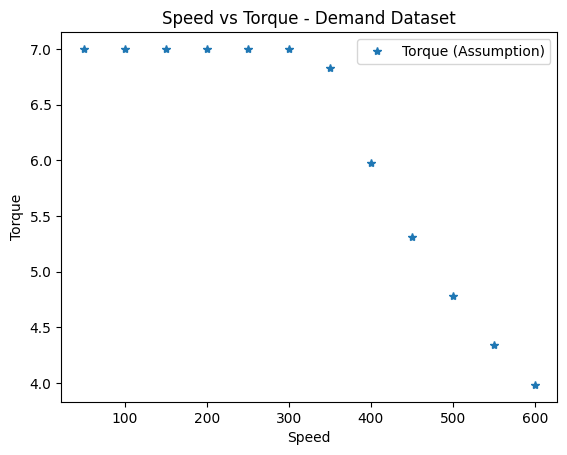

In [43]:
data.plot(x = "Speed (Assumption)", y = "Torque (Assumption)", style = "*")
plt.title("Speed vs Torque - Demand Dataset")
plt.xlabel("Speed")
plt.ylabel("Torque")
plt.show()

Creating Charts
Step Demand Vs Speed // Step Demand vs Torque // Speed Demand vs Torque // Speed vs Time

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


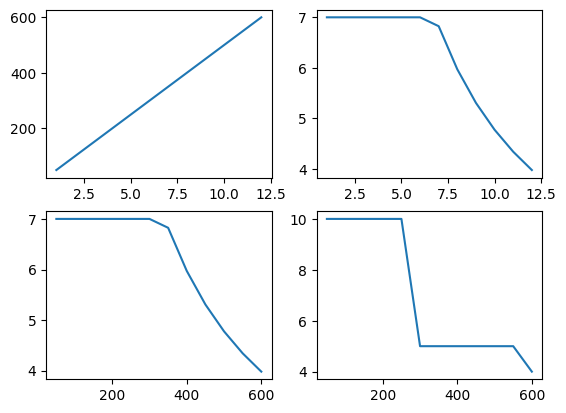

In [44]:
S_no =[]
Length_Data = len(Torque)
for A in range(0,Length_Data):
  S_no.append(A+1)                               #Creating an index common for all the list downloaded
print(S_no)
#------------------------------------------------------------------------------------------------------
data1 = data                                     # Creating an duplicate of the dataset
data1["S_no"] = S_no                             # Adding the created index to the duplicate dataset
figure, data1 = plt.subplots(2,2)                # Creating subplots to visualize the charts 
data1[0,0].plot(S_no ,Speed)                      
data1[0,1].plot(S_no ,Torque)
data1[1,0].plot(Speed ,Torque)
data1[1,1].plot(Speed,Time)
plt.show()

Safety inputs which are considered as the current status of the hardware

In [47]:
Motor_Temp = 27
Motor_Voltage = 36
Battery_SOC = 100
Battery_Temp = 27
Battery_Capacity = 50  #Ah

Calculation Part 

Enter the Key Demand
None1
What is the battery status
100
Demand Step_No:  0   is getting executed
Current consumption for the step no  0   1.0175925925925926
the current cnsumption for step no i with   600   is   0.1695987654320987
Battery_SOC : 99.6608024691358
Speed = 50   Torque = 7.0   Power = 36.63333333333333   Current_Battery_SOC = 99.6608024691358   F_Current = 0.1695987654320987
 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 
Demand Step_No:  1   is getting executed
Current consumption for the step no  1   2.035185185185185
the current cnsumption for step no i with   600   is   0.5087962962962916
Battery_SOC : 98.98240740740742
Speed = 100   Torque = 7.0   Power = 73.26666666666667   Current_Battery_SOC = 98.98240740740742   F_Current = 0.5087962962962916
 ----------------------------------------------------------------------------------

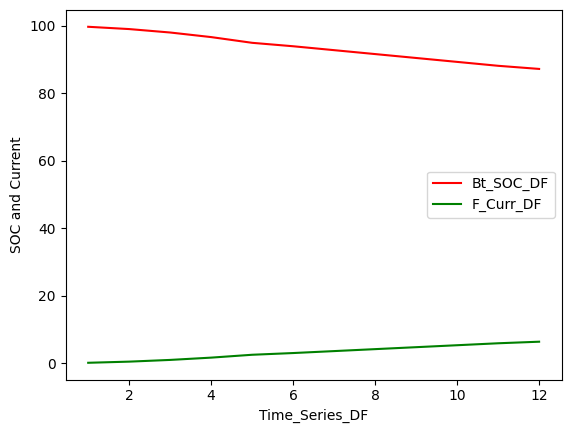

Do You wish to Continue


In [ ]:
#Currnet calculation using Coulomb law
def Current():
  Steps = len(Speed)
  F_Current =0                              # Initiating F_Current as zero, meaning the current consumption till now is zero
  F_Cur = 0
  Tim = 0                                   # Initiating Tim as zero, meaning the test cycle is starting at zero seconds
  #------------------------------------------------------------------------------------------------------------------------------------------------
  Time_Series = []                          # Initiating set of blank list for Time, Battery SOC and Current Consumption
  Bt_SOC = []                               # for collecting those data at each step
  F_Curr = []
  #------------------------------------------------------------------------------------------------------------------------------------------------
  print("What is the battery status")
  SOC_CURRENT = int(input())                # Getting an real time input related to the current soc of the battery
  #-------------------------------------------------------------------------------------------------------------------------------------------------
  SO = ((SOC_CURRENT/100) * Battery_Capacity)
  for i in range(0,Steps):
    print("Demand Step_No: ",i," ","is getting executed")
    # print(F_Cur, i)
    F_Cur = 0
    if(Motor_Temp <= Motor["Max_Temp"] and SOC_CURRENT >= 20 and Battery_Temp <= Battery["Max_Temp"]):
      #----------------------------------------------------------------------------------------------------------------------------------------------
      # Calculating Current from speed and torque
      S = Speed[i]                      #Getting the step speed demand
      T = Torque[i]                     #Getting the step torque demand
      Ti = Time[i]                      #Getting the Time of the step
      Power = (2*3.14*S*T)/60           #Calculating the power of the particular step 
      Current = Power/Motor_Voltage     #Calculating the current consumption of the particular step
      print ("Current consumption for the step no ",i," ",Current)
      Ti_Sec = Ti*60                    #Converting time of the step from mins to secs
      #----------------------------------------------------------------------------------------------------------------------------------------------
      # COULOMB'S LAW : SOC Calculation
      for i in range(0,int(Ti_Sec)):
        F_Current = (Current/3600) + F_Current
        F_Cur = (Current/3600) + F_Cur
      print("the current cnsumption for step no i with"," ",Ti_Sec," ","is"," ",F_Current)
      Battery_SOC = (((SO - ((F_Current)))/(Battery_Capacity)) * 100) #Calculating the current consumption for the each step in kW/s
      print ("Battery_SOC :",Battery_SOC)
      #---------------------------------------------------------------------------------------------------------------------------------------------
      SOC_CURRENT = Battery_SOC
      Tim = Tim +1
      Time_Series.append(Tim)
      Bt_SOC.append(Battery_SOC)
      F_Curr.append(F_Current)
      # Current_Step = (Current*Ti_Sec)/1000    
      if(Battery_SOC < 20):
        break
      print("Speed =",S," ","Torque =",T," ","Power =",Power," ","Current_Battery_SOC =",Battery_SOC, " ", "F_Current =", F_Current)
      print(" ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ ")
    #------------------------------------------------------------------------------------------------------------------------------------------------
    # Safety Alarms
    else:
      if(Motor_Temp > Motor["Max_Temp"]):
        print("Motor Temperature has crossed the safety limits")
      elif(SOC_CURRENT < Battery["Min_SOC"]):
        print("Battery has crossed the lower SOC safety limits")
      elif(Battery_Temp > Battery["Max_Temp"]):
        print("Battery Temperature has crossed the safety limits")
      else:
        print("Something gone wrong. Check the sensor inputs")

  #--------------------------------------------------------------------------------------------------------------------------------------------------
  # Plotting the results
  Bt_SOC_DF = pd.DataFrame(Bt_SOC)
  Time_Series_DF = pd.DataFrame(Time_Series)
  F_Curr_DF = pd.DataFrame(F_Curr)
  plt.plot(Time_Series_DF, Bt_SOC_DF, color='r', label='Bt_SOC_DF')
  plt.plot(Time_Series_DF, F_Curr_DF, color='g', label='F_Curr_DF')
  plt.xlabel("Time_Series_DF")
  plt.ylabel("SOC and Current")
  plt.legend()
  plt.show()
  #---------------------------------------------------------------------------------------------------------------------------------------------------
  # Initiating model 
Key_Dema = 10                                                            # This initiation is to keep the model in repeating condition
while Key_Dema == 10:
  Key_Dem = int(input(print("Enter the Key Demand")))                    # Getting the Ignition key condition to run the motor
  if Key_Dem == 1:                                                       
    if(Motor_Temp <= Motor["Max_Temp"] and Battery_SOC >= Battery["Min_SOC"] and Battery_Temp <= Battery["Max_Temp"]):
      Current()
    #--------------------------------------------------------------------------------------------------------------------------------------------------
    # Safety Alarms
    else:
      if(Motor_Temp > Motor["Max_Temp"]):
        print("Motor Temperature has crossed the safety limits")
      elif(Battery_SOC < Battery["Min_SOC"]):
        print("Battery has crossed the lower SOC safety limits")
      elif(Battery_Temp > Battery["Max_Temp"]):
        print("Battery Temperature has crossed the safety limits")
      else:
        print("Something gone wrong. Check the sensor inputs")
  else:
    print("Key is in Off Condition")
  print("Do You wish to Continue")
  Key_Dema = int(input())                                             # Used to repeat the model if operator gives 10 as an input
  #------------------------------------------------------------------------------------------------------------------------------------------------------
    


  